<a href="https://colab.research.google.com/github/rozhrafiee/socialnetwork/blob/projects/dolphins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# وارد کردن کتابخانه‌های مورد نیاز
import networkx as nx
import pandas as pd
from networkx.algorithms import community
from networkx.algorithms.community.modularity_max import naive_greedy_modularity_communities
from google.colab import files

# آپلود فایل‌های داده
files.upload()


Saving dolphins.clusters to dolphins.clusters
Saving dolphins.edges to dolphins (1).edges
Saving dolphins.louvain to dolphins (1).louvain


{'dolphins.clusters': b'0\t1\n1\t2\n2\t1\n3\t1\n4\t1\n5\t2\n6\t2\n7\t2\n8\t1\n9\t2\n10\t1\n11\t1\n12\t1\n13\t2\n14\t1\n15\t1\n16\t1\n17\t2\n18\t1\n19\t2\n20\t1\n21\t1\n22\t2\n23\t1\n24\t1\n25\t2\n26\t2\n27\t2\n28\t1\n29\t1\n30\t1\n31\t2\n32\t2\n33\t1\n34\t1\n35\t1\n36\t1\n37\t1\n38\t1\n39\t1\n40\t1\n41\t2\n42\t1\n43\t1\n44\t1\n45\t1\n46\t1\n47\t1\n48\t2\n49\t1\n50\t1\n51\t1\n52\t1\n53\t1\n54\t2\n55\t1\n56\t2\n57\t2\n58\t1\n59\t1\n60\t2\n61\t1\n',
 'dolphins (1).edges': b'0\t10\n0\t14\n0\t15\n0\t40\n0\t42\n0\t47\n1\t17\n1\t19\n1\t26\n1\t27\n1\t28\n1\t36\n1\t41\n1\t54\n2\t10\n2\t42\n2\t44\n2\t61\n3\t8\n3\t14\n3\t59\n4\t51\n5\t9\n5\t13\n5\t56\n5\t57\n6\t9\n6\t13\n6\t17\n6\t54\n6\t56\n6\t57\n7\t19\n7\t27\n7\t30\n7\t40\n7\t54\n8\t20\n8\t28\n8\t37\n8\t45\n8\t59\n9\t13\n9\t17\n9\t32\n9\t41\n9\t57\n10\t29\n10\t42\n10\t47\n11\t51\n12\t33\n13\t17\n13\t32\n13\t41\n13\t54\n13\t57\n14\t16\n14\t24\n14\t33\n14\t34\n14\t37\n14\t38\n14\t40\n14\t43\n14\t50\n14\t52\n15\t18\n15\t24\n15\t40\n15\t45\n15\t55

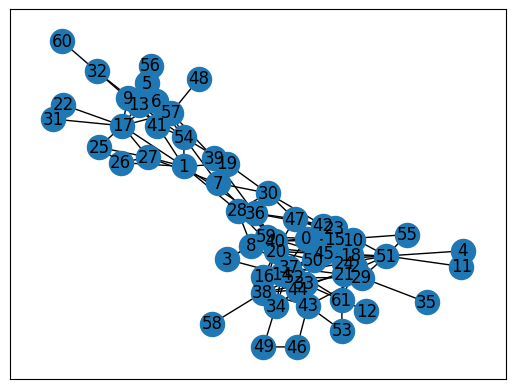

In [4]:
# خواندن داده‌های گراف از فایل و ساخت گراف با استفاده از NetworkX
df = pd.read_csv('/content/dolphins.edges', sep='\t', names=['n1', 'n2'])
G = nx.from_pandas_edgelist(df, 'n1', 'n2', create_using=nx.Graph())

# رسم گراف اولیه
nx.draw_networkx(G)


In [6]:
# تعریف توابع برای اختصاص جامعه (Community) به نودها و یال‌ها
def set_node_community(G, communities):
    # اختصاص شماره جامعه به نودها
    for c, v_c in enumerate(communities):
        for v in v_c:
            G.nodes[v]['community'] = c + 1

def set_edge_community(G):
    # اختصاص شماره جامعه به یال‌ها
    for v, w in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            G.edges[v, w]['community'] = 0

# تعریف تابع برای تولید رنگ برای گره‌ها و یال‌ها
def get_color(i, r_off=1, g_off=3, b_off=5):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low = 0.1
    high = 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 3) % n) / (n - 1)
    b = low + span * (((i + b_off) * 3) % n) / (n - 1)
    return (r, g, b)


In [7]:
# یافتن جوامع با استفاده از الگوریتم Girvan-Newman
result = community.girvan_newman(G)
communities1 = next(result)

# چاپ تعداد جوامع و نودهای هر جامعه
print(len(communities1))
print(communities1)
list(enumerate(communities1))


2
({0, 2, 3, 4, 8, 10, 11, 12, 14, 15, 16, 18, 20, 21, 23, 24, 28, 29, 30, 33, 34, 35, 36, 37, 38, 40, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 55, 58, 59, 61}, {1, 5, 6, 7, 9, 13, 17, 19, 22, 25, 26, 27, 31, 32, 39, 41, 48, 54, 56, 57, 60})


[(0,
  {0,
   2,
   3,
   4,
   8,
   10,
   11,
   12,
   14,
   15,
   16,
   18,
   20,
   21,
   23,
   24,
   28,
   29,
   30,
   33,
   34,
   35,
   36,
   37,
   38,
   40,
   42,
   43,
   44,
   45,
   46,
   47,
   49,
   50,
   51,
   52,
   53,
   55,
   58,
   59,
   61}),
 (1,
  {1,
   5,
   6,
   7,
   9,
   13,
   17,
   19,
   22,
   25,
   26,
   27,
   31,
   32,
   39,
   41,
   48,
   54,
   56,
   57,
   60})]

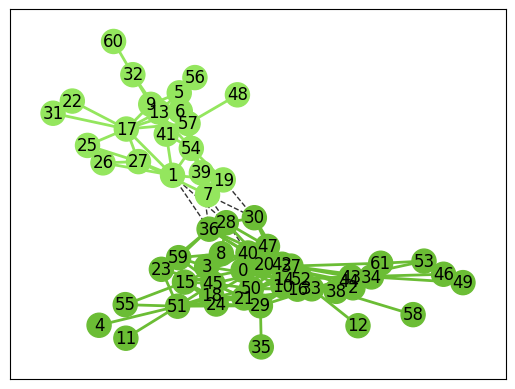

In [8]:
# تنظیم جوامع نودها و یال‌ها و رسم گراف با استفاده از جوامع مشخص‌شده
set_node_community(G, communities1)
set_edge_community(G)

node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = [get_color(G.edges[e]['community']) for e in internal]

dolphins = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos=dolphins, node_color=node_color)
nx.draw_networkx_labels(G, pos=dolphins)
nx.draw_networkx_edges(G, pos=dolphins, edgelist=external, edge_color='#333333', width=1, style='dashed')
nx.draw_networkx_edges(G, pos=dolphins, edgelist=internal, edge_color=internal_color, width=2)


In [9]:
# یافتن جوامع با استفاده از الگوریتم Greedy Modularity
communities2 = community.greedy_modularity_communities(G)

# چاپ تعداد جوامع و نودهای هر جامعه
print(len(communities2))
print(communities2)


4
[frozenset({0, 2, 10, 12, 14, 16, 20, 33, 34, 37, 38, 40, 42, 43, 44, 46, 47, 49, 50, 52, 53, 58, 61}), frozenset({1, 5, 6, 7, 9, 13, 17, 19, 22, 25, 26, 27, 28, 30, 31, 32, 41, 48, 54, 56, 57, 60}), frozenset({35, 3, 4, 8, 11, 45, 15, 18, 51, 21, 55, 23, 24, 59, 29}), frozenset({36, 39})]


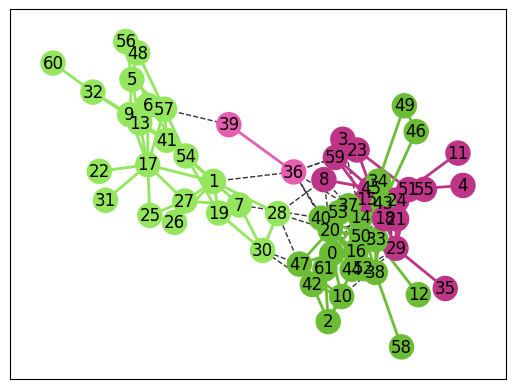

In [10]:
# تنظیم جوامع نودها و یال‌ها و رسم گراف با استفاده از جوامع مشخص‌شده
set_node_community(G, communities2)
set_edge_community(G)

node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = [get_color(G.edges[e]['community']) for e in internal]

dolphins = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos=dolphins, node_color=node_color)
nx.draw_networkx_labels(G, pos=dolphins)
nx.draw_networkx_edges(G, pos=dolphins, edgelist=external, edge_color='#333333', width=1, style='dashed')
nx.draw_networkx_edges(G, pos=dolphins, edgelist=internal, edge_color=internal_color, width=2)


In [11]:
# یافتن جوامع با استفاده از الگوریتم Naive Greedy Modularity
communities3 = community.naive_greedy_modularity_communities(G)

# چاپ تعداد جوامع و نودهای هر جامعه
print(len(communities3))
print(communities3)


4
[frozenset({0, 2, 10, 12, 14, 16, 20, 33, 34, 37, 38, 40, 42, 43, 44, 46, 47, 49, 50, 52, 53, 58, 61}), frozenset({1, 5, 6, 7, 9, 13, 17, 19, 22, 25, 26, 27, 28, 30, 31, 32, 41, 48, 54, 56, 57, 60}), frozenset({3, 4, 35, 8, 11, 45, 15, 18, 51, 21, 55, 23, 24, 59, 29}), frozenset({36, 39})]
